## Finding maximum subarray

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import math
import random
from scipy.optimize import curve_fit
import statistics
import warnings
warnings.simplefilter('ignore')

In [2]:
def find_max_crossing_subarray(A, low, mid, high):
    left_sum = -np.inf
    sum = 0
    
    for i in reversed(range(low, mid + 1)):
        sum = sum + A[i-1]
        if sum > left_sum:
            left_sum = sum
            max_left = i
    right_sum = -np.inf
    sum = 0
    
    for j in range(mid + 1, high + 1):
        sum = sum + A[j-1]
        if sum > right_sum:
            right_sum = sum
            max_right = j
            
    return (max_left, max_right, left_sum + right_sum)

def find_maximum_subarray(A, low, high):
    
    if high == low:
        return (low, high, A[low - 1])
    
    else:  
        mid = (low + high) // 2
        left_low, left_high, left_sum = find_maximum_subarray(A, low, mid)
        right_low, right_high, right_sum = find_maximum_subarray(A, mid+1, high)
        cross_low, cross_high, cross_sum = find_max_crossing_subarray(A, low, mid, high)
        
        if (left_sum >= right_sum) and (left_sum >= cross_sum):
            return (left_low, left_high, left_sum)
        
        elif (right_sum >= left_sum) and (right_sum >= cross_sum):
            return right_low, right_high, right_sum
        
        else:
            return cross_low, cross_high, cross_sum

In [3]:
def plot(A, left, right):
    plt.figure(figsize=(20, 10))
    input_data = [i+1 for i in range(len(A))]
    plt.plot(input_data, A, label='Input data')
    plt.axvline(x=left, linestyle='dashed', color='r', label='Maximum subarray')
    plt.axvline(x=right, linestyle='dashed', color='r')
    plt.grid()
    plt.legend(fontsize='xx-large')
    plt.show()

example from book:

Значения:  [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]


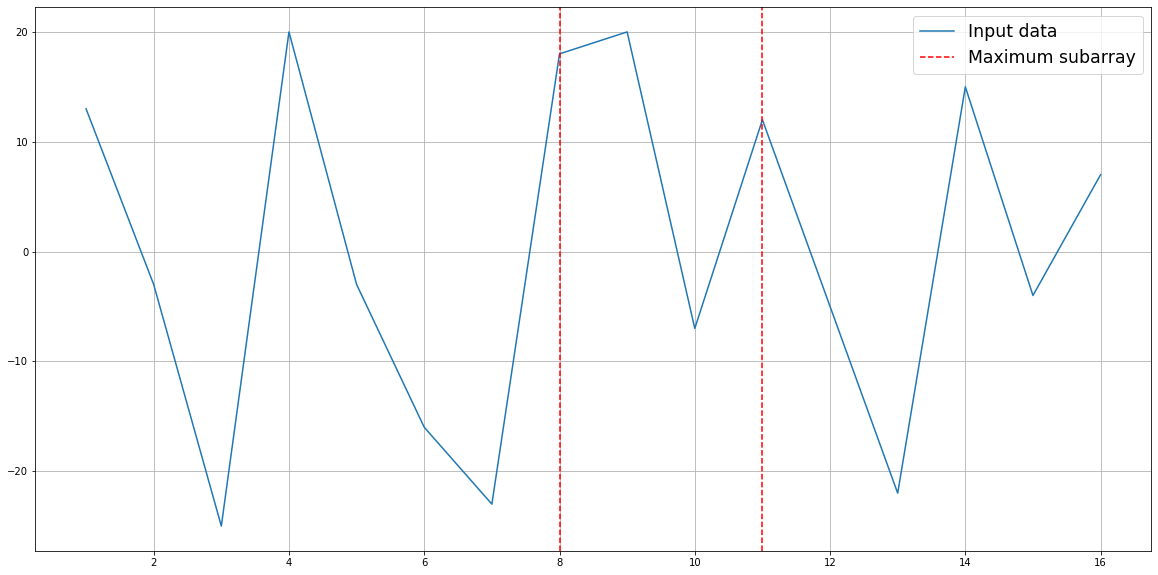

In [4]:
A=[13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
print('Значения: ', A)
resut=find_maximum_subarray(A, 1, len(A))
left, right = resut[0], resut[1]
plot(A, left, right)

Значения:  [18, -15, -3, 18, -13, -11, -18, 10, -9, 11, 10, -20, 16, 10, -12, 17, -19, 17, -16, 17]


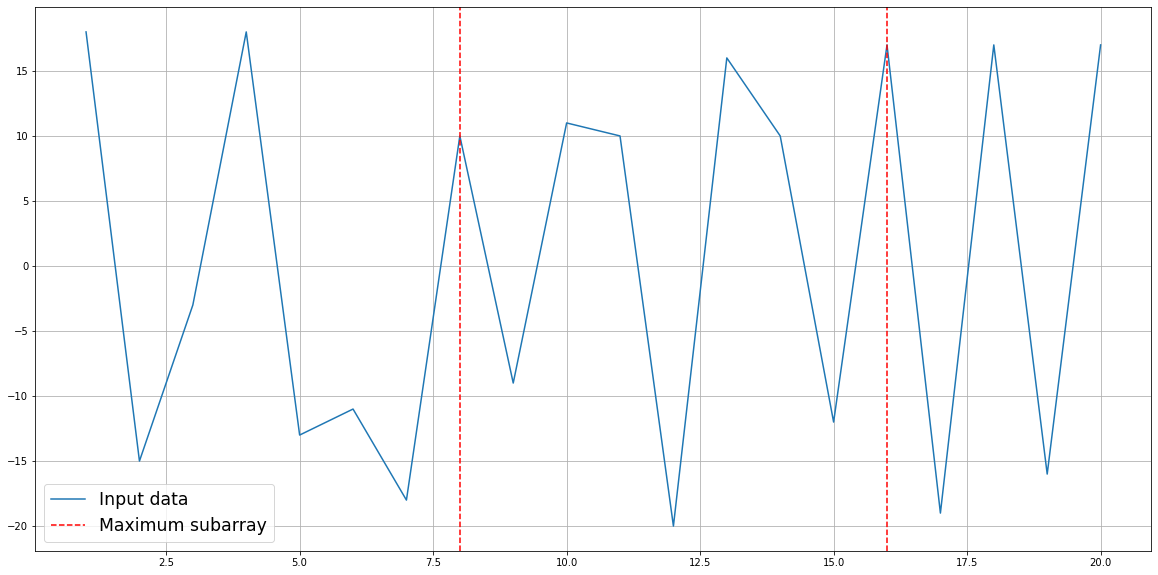

In [5]:
A = np.random.randint(-20, 20, 20)
print('Значения: ', list(A))
resut = find_maximum_subarray(A, 1, len(A))
left, right = resut[0], resut[1]
plot(A, left, right)

In [6]:
def loglin_theor(x, a):
    return a * x * np.log(x) 

In [7]:
times = []
num = list(range(1, 10001, 10))

for n in num:
    A = np.random.randint(-20, 20, n)
    res_time=0
    for t in range(5):
        start_time = time.time()
        result = find_maximum_subarray(A, 1, len(A))
        current_time = time.time() - start_time
        res_time = res_time + current_time
    mean_time = res_time / 5
    
    times.append(mean_time)

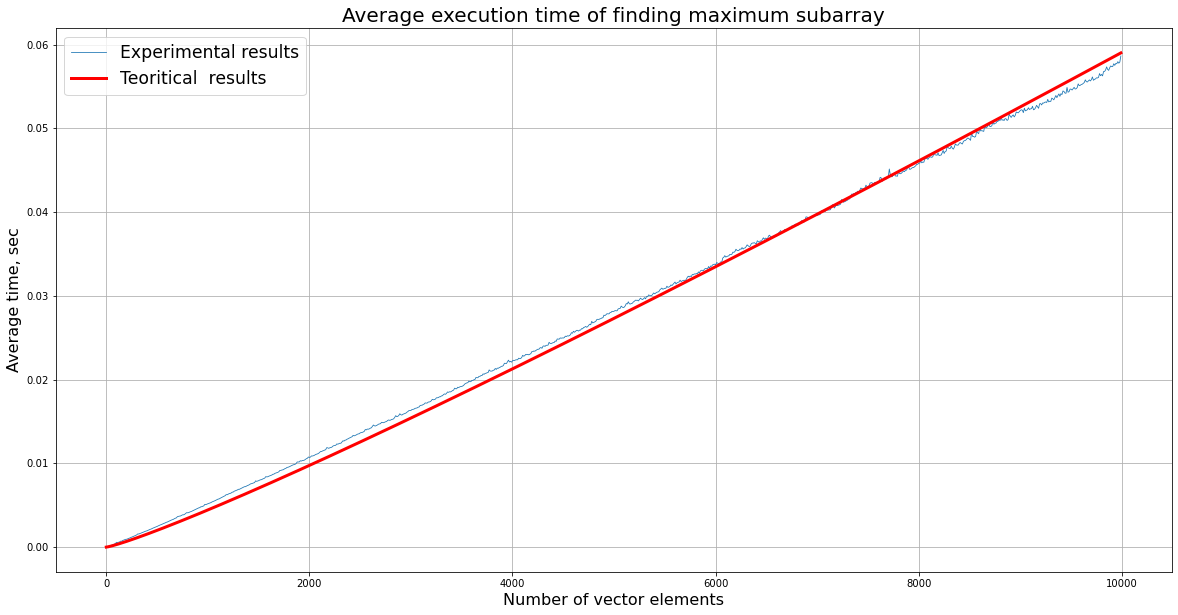

In [8]:
popt, pcov = curve_fit(loglin_theor, num, times)
time_theor = []
for n in num:
    time_theor.append(loglin_theor(n, *popt))

plt.figure(figsize=(20, 10))

plt.plot(num, times, label="Experimental results", linewidth=0.8)
plt.plot(num, time_theor, label="Teoritical  results", linewidth=3, color='red')
plt.legend(fontsize='xx-large')
plt.title('Average execution time of finding maximum subarray', fontsize=20)
plt.xlabel('Number of vector elements', fontsize=16)
plt.ylabel('Average time, sec', fontsize=16)
plt.grid()
plt.savefig('find_maximum_subarray.png', dpi=300)

## Longest common subsequence

In [9]:
def lcs_1(A, B):
    n = len(A)
    m = len(B)
    
    F = [[0] * (m + 1) for i in range(n + 1)]
    
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if A[i - 1] == B[j - 1]:
                F[i][j] = F[i - 1][j - 1] + 1 
            else: 
                F[i][j] = max(F[i - 1][j], F[i][j - 1]) 
                
    return F[n][m]

In [10]:
def len_x_len_y(length, a):
    return a*length

In [11]:
letters = 'ABCDEFGHIJKLMNOPQRDSTUVWXYZ'

def generate_sequence(length):
    sequence = ''
    for i in range(length):
        sequence += letters[random.randint(0,len(letters)-1)]
    return sequence

In [12]:
def example(i):
    lcs_data = pd.DataFrame(columns=['first_sequence', 'second_sequence', 'longest_common_subsequence'])
    lcs = []
    X = []
    Y = []
    for i in range(i):
        m = random.randint(10, 31)
        n = random.randint(20, 41)
        x = generate_sequence(m)
        y = generate_sequence(n)
        
        lcs_data = lcs_data.append({'first_sequence': x, 'second_sequence': y,
                                    'longest_common_subsequence': lcs_1(x, y)}, ignore_index=True)
        X.append(x)
        Y.append(y)
        lcs.append(lcs_1(x, y))
    return lcs_data

In [13]:
example(10)

,first_sequence,second_sequence,longest_common_subsequence
0,MUFNBRYGVEGSRWUZQVVOM,BILZNFWEIURCQTOFLIDREOHGKGXMJOS,6
1,AMXHIBVPZMBGDRCAMDDFJJDHDSSGMWA,OLDAKLKWFHAKKEHODABZU,6
2,FUDIYJOPPFDUMZYJQPJSYQJVI,KJQKAKJMJLWCDIFCZFWHNDZLHORCMJHTMLSDJYAQ,9
3,AFKXSADDKYPKBE,HYLNKKAWVQZWXNHOGTNYEZWPSZUDYTNJY,5
4,EPSFZZWCZQHXOYLDFMMLXXYKBZMCG,SMTWTPPQAHRAPHOVZEXTCDDMBJRXWDZSAUX,9
5,DFZWPEFJUDJIXEZ,KZTRERTEWDVIDHJPDTPVHBDLBFPVFFLEICUWC,5
6,JQSFQNOCDMJNPXRGIXEKGPMOYKYJU,JZJMTSXATJRIZFRAVBKEFPCPATPZ,7
7,UVNVRSWMXCEPTDZQXPDFFX,MFULFZRCTYFPDUQLZJDQDTEDFVGWSXDLQF,10
8,NDLERXIZDTMGQKEIRTCWG,KXLXFLGBOQRHUWSJADHDURJRMHEMZD,6
9,DJRBGEMFEDTHQZDFZDTRDKUTGBHFXS,WCCWCODLLYKQHDQDRDCGOVFOVWSZVFRXOIFU,9


In [14]:
times = []
m_s = []
n_s = []
num = 0

for m, n in zip(range(1, 501), range(1,1001,2)):
    num += 1
    res_time=0
    X = generate_sequence(m)
    Y = generate_sequence(n)
    for t in range(5):
        start_time = time.time()
        lcs_1(X, Y)
        current_time = time.time() - start_time
        res_time = res_time + current_time
    mean_time = res_time / 5
    times.append(mean_time)
    m_s.append(m)
    n_s.append(n)  

In [15]:
num = list(range(1, num+1))
length = []
for m, n in zip(m_s, n_s):
    length.append(m * n)
        
popt, pcov = curve_fit(len_x_len_y, length, times)
    
time_theor = []

for m, n in zip(m_s, n_s):
    length = m * n
    time_theor.append(len_x_len_y(length, *popt))

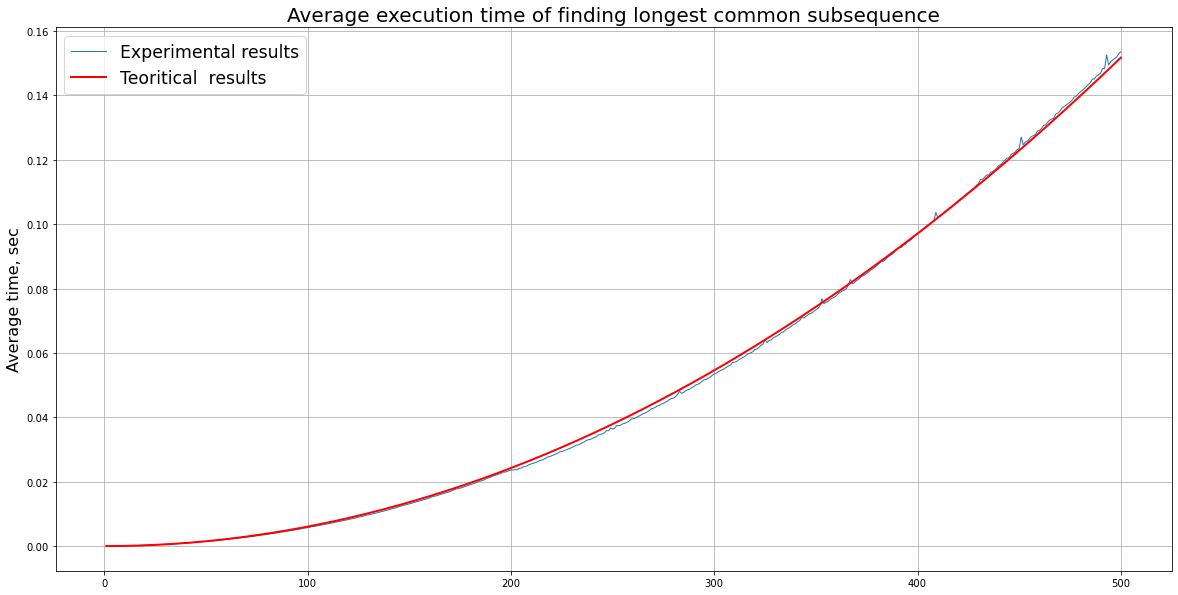

In [16]:
plt.figure(figsize=(20, 10))
plt.plot(num, times, label="Experimental results", linewidth=1)
plt.plot(num, time_theor, label="Teoritical  results", linewidth=2, color='red')

plt.title('Average execution time of finding longest common subsequence', fontsize=20)
plt.ylabel('Average time, sec', fontsize=16)
plt.legend(fontsize='xx-large')
plt.grid()
plt.savefig('longest_common_subsequence.png', dpi=300)